- Import and use `mplot3d`, `ipympl`, and `widget`:
    - If needed: `pip install ipympl`
    - `from mpl_toolkits import mplot3d`
    - `%matplotlib widget`
    - `fig = plt.figure()`
    - `ax = plt.axes(projection='3d')`
- 3D plot funcs:
    - `ax.plot3D(xline, yline, zline, 'gray')`: 3D Line
    - `ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')`
    - `ax.contour3D(X, Y, Z, 50, cmap='binary')`
    - `ax.plot_wireframe(X, Y, Z, color='black')`
    - `ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')`
        - Works with polar grids, i.e. not rectangular
    - `ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none');`
    - `ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap='viridis', linewidths=0.2);`
        - Control triangulation with `triangles=tri.triangles`
- Relevant NumPy funcs:
    - `np.linspace()`
    - `X, Y = np.meshgrid(x, y)`
    - `np.ravel()`
    - `np.cos(), np.sin()`
    - `np.random.randn(), np.random.random()`

In [1]:
%matplotlib?

Docstring:
::

  %matplotlib [-l] [gui]

Set up matplotlib to work interactively.

This function lets you activate matplotlib interactive support
at any point during an IPython session. It does not import anything
into the interactive namespace.

If you are using the inline matplotlib backend in the IPython Notebook
you can set which figure formats are enabled using the following::

    In [1]: from IPython.display import set_matplotlib_formats

    In [2]: set_matplotlib_formats('pdf', 'svg')

The default for inline figures sets `bbox_inches` to 'tight'. This can
cause discrepancies between the displayed image and the identical
image created using `savefig`. This behavior can be disabled using the
`%config` magic::

    In [3]: %config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

In addition, see the docstring of
`IPython.display.set_matplotlib_formats` and
`IPython.display.set_matplotlib_close` for more information on
changing additional behaviors of the inline backend.


In [2]:
%matplotlib

Using matplotlib backend: <object object at 0x000001F848D57550>


In [3]:
%matplotlib -l

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'webagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [4]:
from mpl_toolkits import mplot3d

In [5]:
# %matplotlib inline
# %matplotlib notebook
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

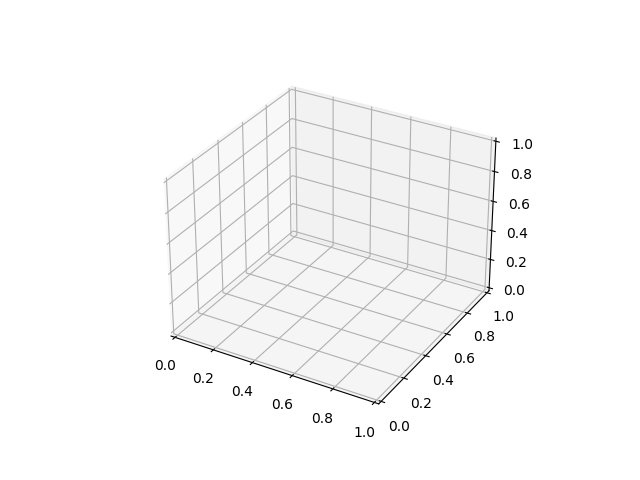

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')    # not fig.axes()

### 3D Points and Lines

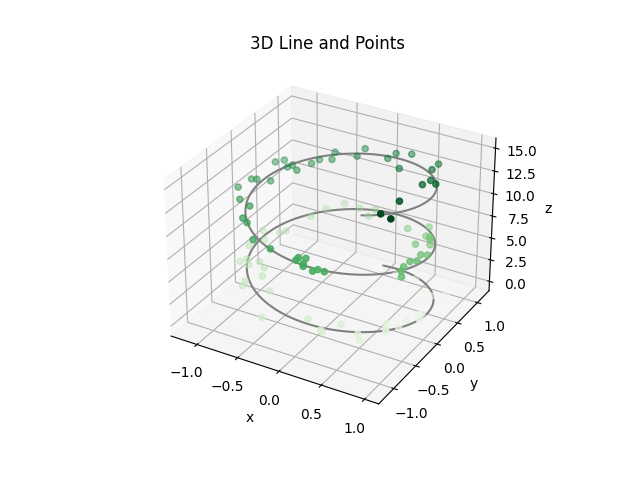

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
ax.set(title='3D Line and Points');
ax.set(xlabel='x', ylabel='y', zlabel='z');

In [48]:
np.linspace?

Signature:
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is Fals

In [49]:
np.random.randn?

Docstring:
randn(d0, d1, ..., dn)

Return a sample (or samples) from the "standard normal" distribution.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `standard_normal`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

.. note::
    New code should use the ``standard_normal`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

If positive int_like arguments are provided, `randn` generates an array
of shape ``(d0, d1, ..., dn)``, filled
with random floats sampled from a univariate "normal" (Gaussian)
distribution of mean 0 and variance 1. A single float randomly sampled
from the distribution is returned if no argument is provided.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, must be non-negative.
    If no argument is given a single Python

### 3D Contour Plots

In [8]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [9]:
x.shape, X.shape

((30,), (30, 30))

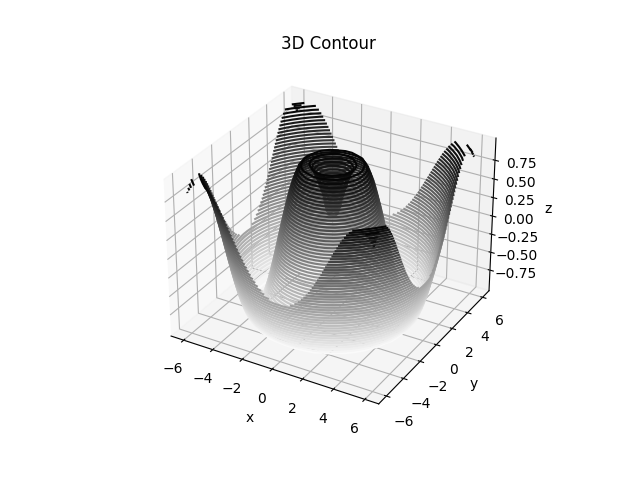

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set(title='3D Contour')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

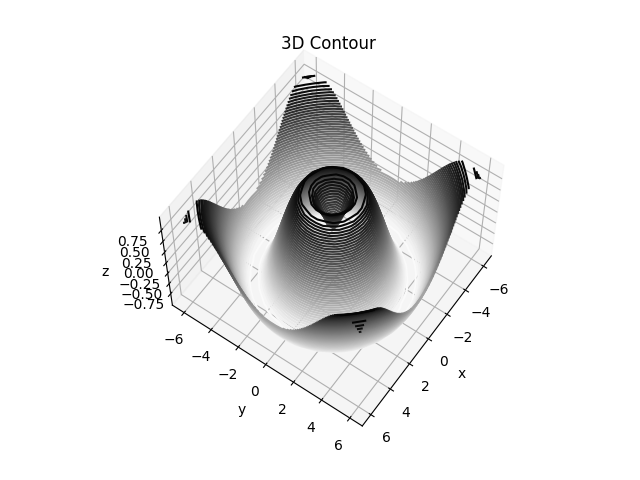

In [11]:
ax.view_init(60, 35)    # This is optional with interactive plots.
fig.show()

### Wireframes and Surface Plots

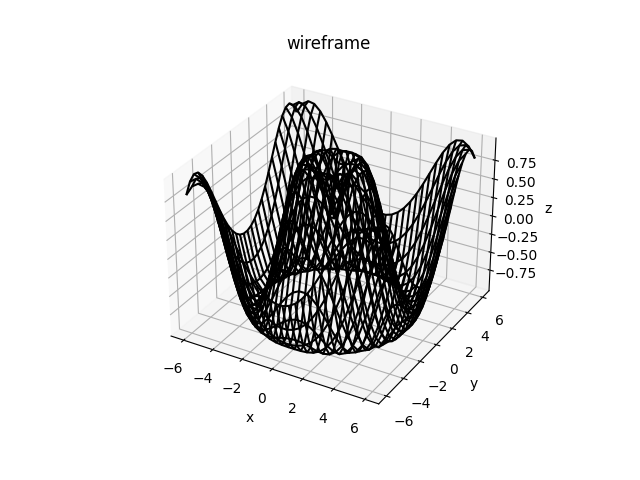

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');
ax.set(xlabel='x', ylabel='y', zlabel='z');

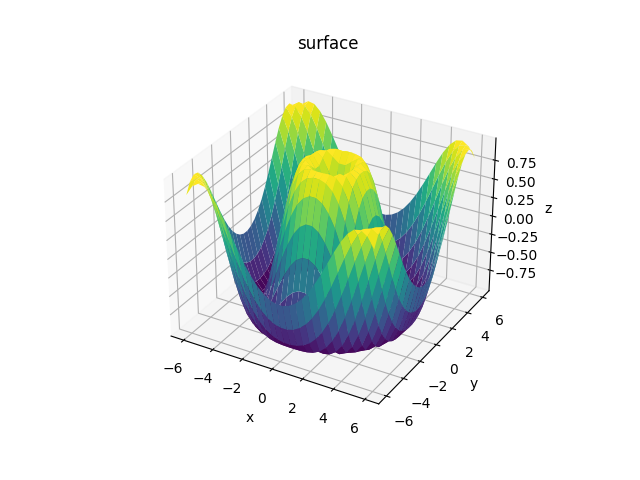

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface');
ax.set(xlabel='x', ylabel='y', zlabel='z');

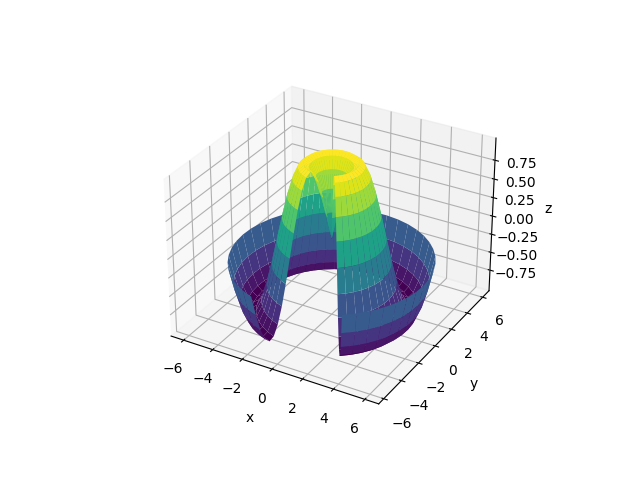

In [29]:
# a polar surface plot, showing that the grid doesn't need to be rectilinear
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none');
ax.set(xlabel='x', ylabel='y', zlabel='z');
#fig.show()

In [15]:
plt.close()

### Surface Triangulations

In [16]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)

x = np.ravel(r * np.sin(theta))    # returns a contiguous flattened array
y = np.ravel(r * np.cos(theta))
z = f(x, y)

In [50]:
np.random.random?

Docstring:
random(size=None)

Return random floats in the half-open interval [0.0, 1.0). Alias for
`random_sample` to ease forward-porting to the new random API.
Type:      builtin_function_or_method


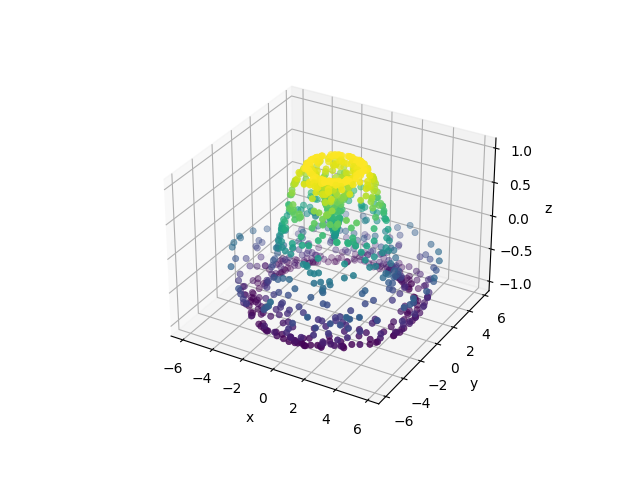

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);
ax.set(xlabel='x', ylabel='y', zlabel='z');

In [18]:
x.shape, y.shape, z.shape

((1000,), (1000,), (1000,))

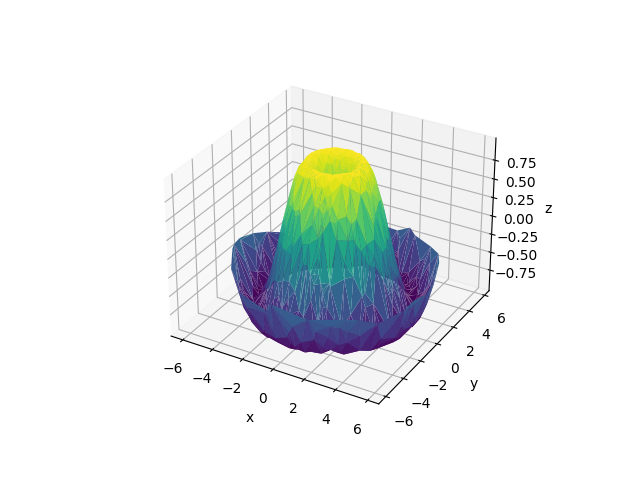

In [19]:
# such a triangulation offers great flexibility 
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none');
ax.set(xlabel='x', ylabel='y', zlabel='z');

In [20]:
ax.plot_trisurf?

Signature:
ax.plot_trisurf(
    *args,
    color=None,
    norm=None,
    vmin=None,
    vmax=None,
    lightsource=None,
    **kwargs,
)
Docstring:
Plot a triangulated surface.

The (optional) triangulation can be specified in one of two ways;
either::

  plot_trisurf(triangulation, ...)

where triangulation is a `~matplotlib.tri.Triangulation` object, or::

  plot_trisurf(X, Y, ...)
  plot_trisurf(X, Y, triangles, ...)
  plot_trisurf(X, Y, triangles=triangles, ...)

in which case a Triangulation object will be created.  See
`.Triangulation` for a explanation of these possibilities.

The remaining arguments are::

  plot_trisurf(..., Z)

where *Z* is the array of values to contour, one per point
in the triangulation.

Parameters
----------
X, Y, Z : array-like
    Data values as 1D arrays.
color
    Color of the surface patches.
cmap
    A colormap for the surface patches.
norm : Normalize
    An instance of Normalize to map values to colors.
vmin, vmax : float, default: None
    Mini

#### e.g.: Visualizing a Mobius strip

In [38]:
# 2 intrinsic dimensions
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

In [39]:
theta.shape, w.shape

((30, 8), (30, 8))

In [40]:
# have the strip make half a twist during a full loop
phi = 0.5 * theta
phi.shape

(30, 8)

In [35]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

In [41]:
r.shape, x.shape, y.shape, z.shape

((30, 8), (240,), (240,), (240,))

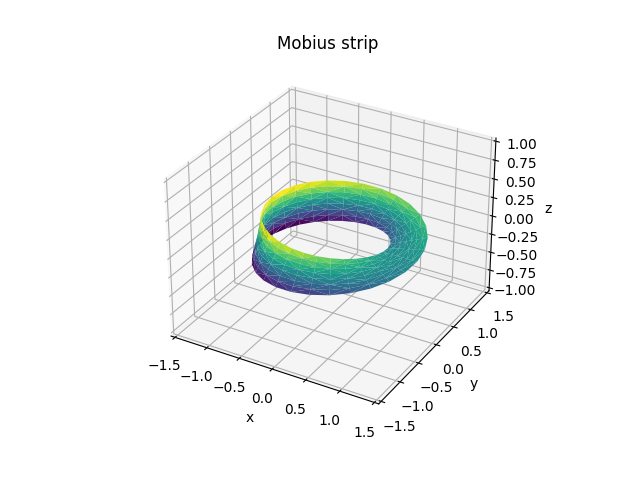

In [42]:
# triangulate in the underlying parameterization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap='viridis', linewidths=0.2);

ax.set(title='Mobius strip')
ax.set(xlim=(-1.5, 1.5), ylim=(-1.5, 1.5), zlim=(-1, 1));
ax.set(xlabel='x', ylabel='y', zlabel='z');

In [26]:
Triangulation?

Init signature: Triangulation(x, y, triangles=None, mask=None)
Docstring:     
An unstructured triangular grid consisting of npoints points and
ntri triangles.  The triangles can either be specified by the user
or automatically generated using a Delaunay triangulation.

Parameters
----------
x, y : (npoints,) array-like
    Coordinates of grid points.
triangles : (ntri, 3) array-like of int, optional
    For each triangle, the indices of the three points that make
    up the triangle, ordered in an anticlockwise manner.  If not
    specified, the Delaunay triangulation is calculated.
mask : (ntri,) array-like of bool, optional
    Which triangles are masked out.

Attributes
----------
triangles : (ntri, 3) array of int
    For each triangle, the indices of the three points that make
    up the triangle, ordered in an anticlockwise manner. If you want to
    take the *mask* into account, use `get_masked_triangles` instead.
mask : (ntri, 3) array of bool
    Masked out triangles.
is_dela

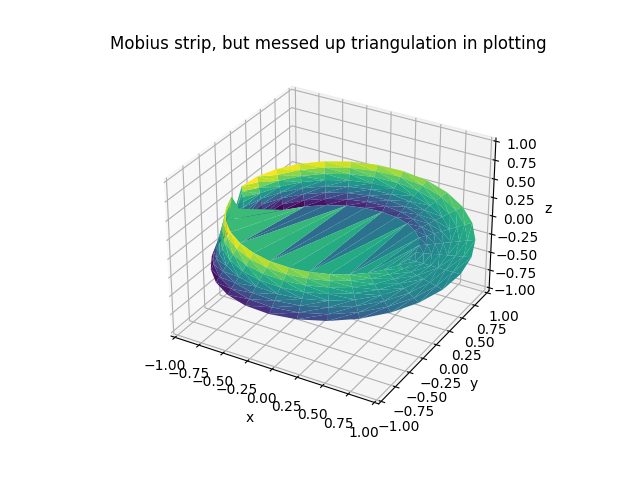

In [37]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', linewidths=0.2);

ax.set(title='Mobius strip, but messed up triangulation in plotting')
ax.set(xlim=(-1, 1), ylim=(-1, 1), zlim=(-1, 1));
ax.set(xlabel='x', ylabel='y', zlabel='z');

In [45]:
dir(tri)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cpp_triangulation',
 '_edges',
 '_extract_triangulation_params',
 '_neighbors',
 '_trifinder',
 'calculate_plane_coefficients',
 'edges',
 'get_cpp_triangulation',
 'get_from_args_and_kwargs',
 'get_masked_triangles',
 'get_trifinder',
 'is_delaunay',
 'mask',
 'neighbors',
 'set_mask',
 'triangles',
 'x',
 'y']

In [46]:
np.ravel?

Signature: np.ravel(a, order='C')
Docstring:
Return a contiguous flattened array.

A 1-D array, containing the elements of the input, is returned.  A copy is
made only if needed.

As of NumPy 1.10, the returned array will have the same type as the input
array. (for example, a masked array will be returned for a masked array
input)

Parameters
----------
a : array_like
    Input array.  The elements in `a` are read in the order specified by
    `order`, and packed as a 1-D array.
order : {'C','F', 'A', 'K'}, optional

    The elements of `a` are read using this index order. 'C' means
    to index the elements in row-major, C-style order,
    with the last axis index changing fastest, back to the first
    axis index changing slowest.  'F' means to index the elements
    in column-major, Fortran-style order, with the
    first index changing fastest, and the last index changing
    slowest. Note that the 'C' and 'F' options take no account of
    the memory layout of the underlying array